In [22]:
import pandas as pd
from matplotlib import pyplot
from sklearn import preprocessing
import seaborn as sns
import datetime as dt
from statsmodels.tsa.stattools import adfuller
import numpy as np

pyplot.rcParams["figure.figsize"] = (16,6)

In [8]:
start_date = '2016-01-04T00'
end_date = '2020-03-02T00'

#### Import Price Data

In [2]:
price_data = pd.read_csv("../price data/iDhP/candles_btc-usd_1h.csv")
new_price_data = price_data.copy()
new_price_data['timestamp'] = [pd.Timestamp(t) for t in price_data['timestamp']]
new_price_data['from'] = [pd.Timestamp(t) for t in price_data['from']]
new_price_data['to'] = [pd.Timestamp(t) for t in price_data['to']]
new_price_data.head()

,timestamp,exchange,market,base,quote,from,to,open,close,high,low,volume_base,volume_quote
0,2011-01-01 00:00:00,cccagg,btc-usd,btc,usd,2010-12-31 23:00:00,2011-01-01 00:00:00,0.29200,0.29200,0.3,0.292,117.551667,35.08125
1,2011-01-01 01:00:00,cccagg,btc-usd,btc,usd,2011-01-01 00:00:00,2011-01-01 01:00:00,0.29997,0.29997,0.3,0.289,223.004583,66.02750
2,2011-01-01 02:00:00,cccagg,btc-usd,btc,usd,2011-01-01 01:00:00,2011-01-01 02:00:00,0.29997,0.29997,0.3,0.289,223.004583,66.02750
3,2011-01-01 03:00:00,cccagg,btc-usd,btc,usd,2011-01-01 02:00:00,2011-01-01 03:00:00,0.29997,0.29997,0.3,0.289,223.004583,66.02750
4,2011-01-01 04:00:00,cccagg,btc-usd,btc,usd,2011-01-01 03:00:00,2011-01-01 04:00:00,0.29997,0.29997,0.3,0.289,223.004583,66.02750


#### Import Wikipedia User Activity Data

In [3]:
wiki_data = pd.read_csv("../data connectors/wikipedia/data.csv")
new_wiki_data = wiki_data[wiki_data['article'] == 'Bitcoin'].copy()
new_wiki_data.drop(columns=wiki_data.columns.to_list()[:1],inplace=True)
new_wiki_data['timestamp'] = new_wiki_data['timestamp'].astype('str')
new_wiki_data['timestamp'] = [pd.Timestamp(year=int(t[:4]),month=int(t[4:6]),day=int(t[6:8]),hour=0) for t in new_wiki_data['timestamp'].to_list()]
new_wiki_data.head()

,article,timestamp,views
0,Bitcoin,2015-07-01,13137
1,Bitcoin,2015-07-02,9938
2,Bitcoin,2015-07-03,8498
3,Bitcoin,2015-07-04,9113
4,Bitcoin,2015-07-05,8908


### Plotting normal data

In [9]:
new_price_data.index = new_price_data['timestamp']
new_wiki_data.index = new_wiki_data['timestamp']

In [10]:
new_price_data = new_price_data[start_date:end_date].copy()
new_wiki_data = new_wiki_data[start_date:end_date].copy()

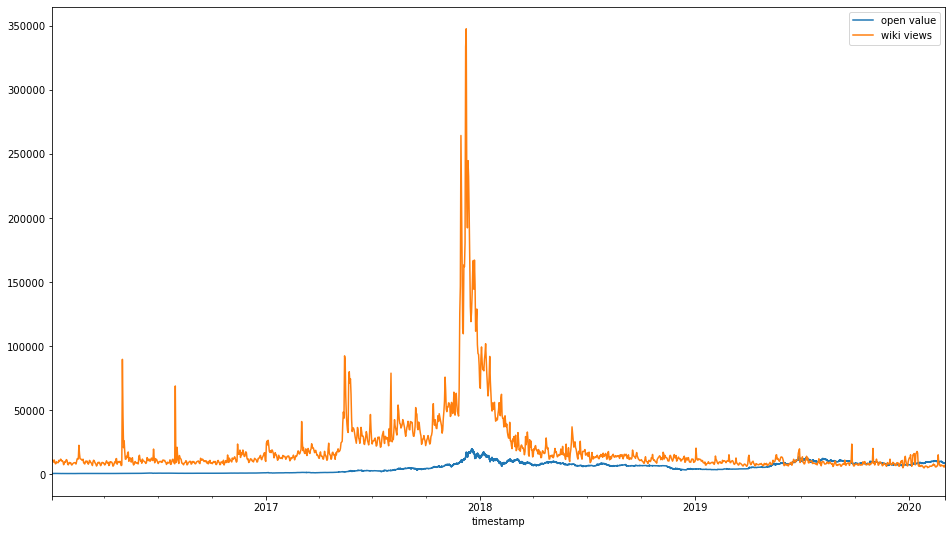

In [11]:
new_price_data['open'].plot(label='open value')
new_wiki_data['views'].plot(label='wiki views')
#new_trends_data['normalized_trends'].plot(label='google trends')

pyplot.legend()
pyplot.show()

In [34]:
# Price Data Aggregation
new_price_data['day'] = [ts.strftime('%Y-%m-%d') for ts in new_price_data['timestamp'].to_list()]
new_price_data = new_price_data.groupby(by=['day']).sum()
new_price_data.index = [pd.Timestamp(ts) for ts in new_price_data.index.to_list()]

In [35]:
min_max_scaler = preprocessing.MinMaxScaler()

price_val = new_price_data['open'].values
normalized_price_val = min_max_scaler.fit_transform(price_val.reshape(price_val.shape[0],1))
new_price_data['normalized_open'] = normalized_price_val.reshape(-1,1)

wiki_view = new_wiki_data['views'].values
normalized_wiki_view = min_max_scaler.fit_transform(wiki_view.reshape(wiki_view.shape[0],1))
new_wiki_data['normalized_views'] = normalized_wiki_view.reshape(-1,1)

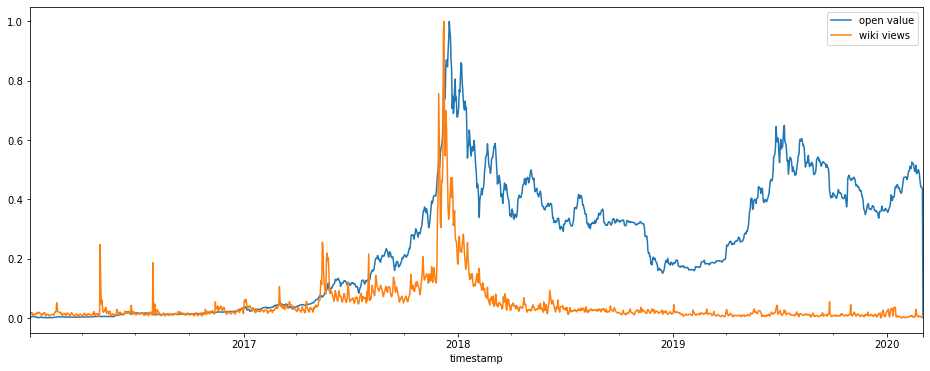

In [36]:
new_price_data['normalized_open'].plot(label='open value')
new_wiki_data['normalized_views'].plot(label='wiki views')
#new_trends_data['normalized_trends'].plot(label='google trends')

pyplot.legend()
pyplot.show()

### Difference between differences

In [39]:
price_d = new_price_data['2019-01-01':'2019-01-15'].copy() 
wiki_d = new_wiki_data['2019-01-01':'2019-01-15'].copy()

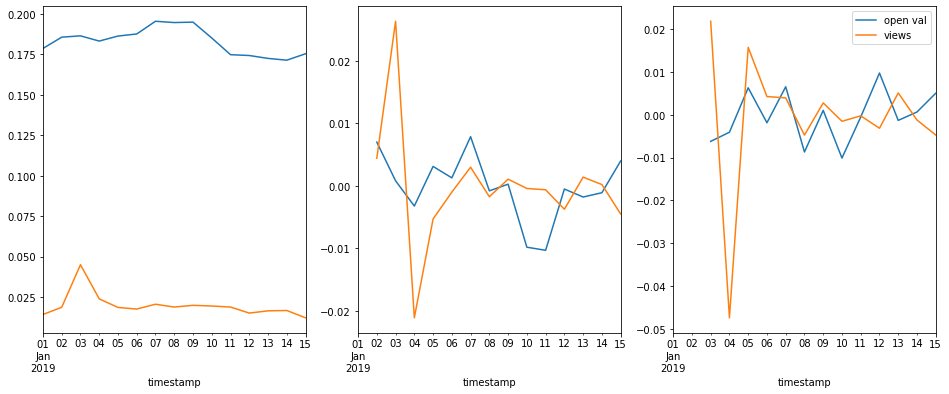

In [40]:
pyplot.subplot(1,3,1)
price_d['normalized_open'].plot(label='open val')
wiki_d['normalized_views'].plot(label='views')

pyplot.subplot(1,3,2)
price_d['normalized_open'].diff().plot(label='open val')
wiki_d['normalized_views'].diff().plot(label='views')

pyplot.subplot(1,3,3)
price_d['normalized_open'].diff().diff().plot(label='open val')
wiki_d['normalized_views'].diff().diff().plot(label='views')


pyplot.legend()
pyplot.show()


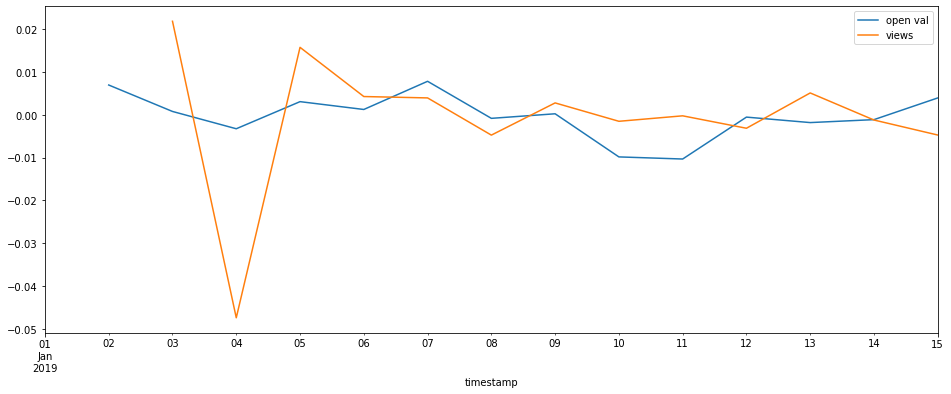

In [41]:

price_d['normalized_open'].diff().plot(label='open val')
wiki_d['normalized_views'].diff().diff().plot(label='views')

pyplot.legend()
pyplot.show()